In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Black_revised.csv')


species_counts = df['scientificname'].value_counts()

# Print the species and their counts
#for species, count in species_counts.items():
 #  print(f"Species: {species}, Count: {count}")


#print(df.columns)

In [2]:

# Group the data by 'Year collected' and 'Season collected' and count unique species
species_richness = df.groupby(['yearcollected', 'seasoncollected'])['scientificname'].nunique().reset_index()


species_richness.rename(columns={'scientificname': 'Species Richness'}, inplace=True)


#print(species_richness)


In [3]:

# Group the data by 'Year collected' and 'Season collected' and get unique species with their counts
species_richness = df.groupby(['yearcollected', 'seasoncollected', 'scientificname'])['scientificname'].count().reset_index(name='Count')


#print(species_richness)


In [4]:

# Group the data by 'Year collected' and 'Season collected' and get unique species with their counts
species_richness = df.groupby(['yearcollected', 'seasoncollected', 'scientificname'])['scientificname'].count().reset_index(name='Count')


sorted_species = species_richness.sort_values(by='Count', ascending=False)
threshold = 2  

# Filter for species with counts above the threshold
high_count_species = sorted_species[sorted_species['Count'] > threshold]


#print(high_count_species)


In [5]:

# Filter the DataFrame for the species 'Cerastoderma glaucum'
cerastoderma_data = df[df['scientificname'] == 'Cerastoderma glaucum']


years_of_interest = [1992, 1986, 1988, 1985]
cerastoderma_counts = cerastoderma_data[cerastoderma_data['yearcollected'].isin(years_of_interest)]

# Group the filtered data by year and count the occurrences
counts_by_year = cerastoderma_counts.groupby('yearcollected')['scientificname'].count().reset_index(name='Count')


#plt.figure(figsize=(10, 6))
#sns.barplot(x='yearcollected', y='Count', data=counts_by_year, palette='Blues')
#plt.xlabel('Year')
#plt.ylabel('Count')
#plt.title('Counts of Cerastoderma glaucum by Year')
#plt.xticks(rotation=45)
#plt.show()


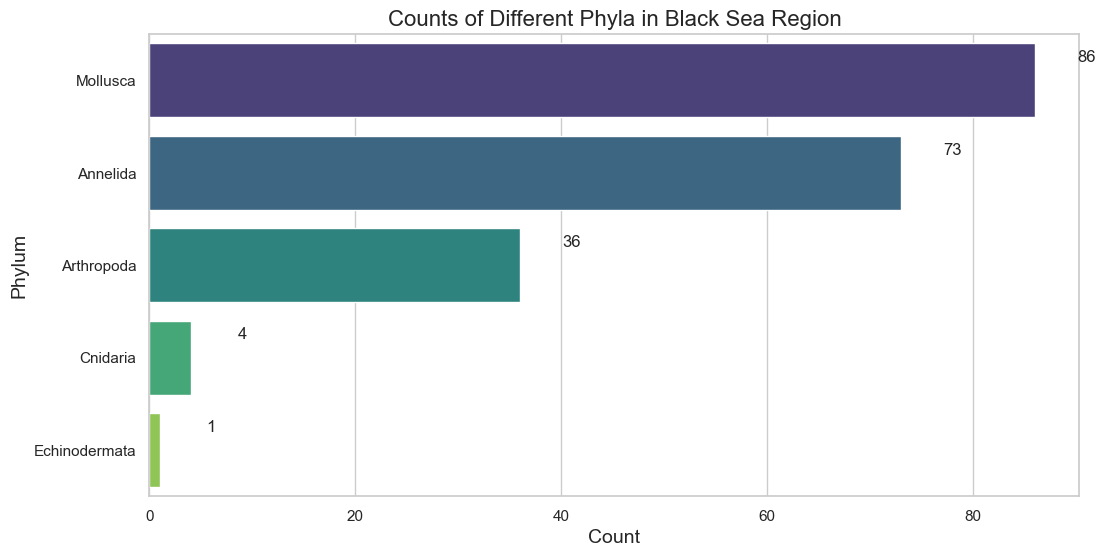

In [6]:

# Group the data by 'phylum' and count the occurrences of each phylum
phylum_counts = df['phylum'].value_counts().reset_index()
phylum_counts.columns = ['Phylum', 'Count']


plt.figure(figsize=(12, 6))
sns.set(style="whitegrid") 
ax = sns.barplot(x="Count", y="Phylum", data=phylum_counts, palette="viridis")


plt.xlabel('Count', fontsize=14)
plt.ylabel('Phylum', fontsize=14)
plt.title('Counts of Different Phyla in Black Sea Region', fontsize=16)


for p in ax.patches:
    width = p.get_width()
    plt.text(width + 5, p.get_y() + p.get_height() / 2 - 0.2, int(width), ha="center", fontsize=12)

plt.savefig("phylum_counts_plot_Black_sea.pdf", format="pdf")
plt.show()


In [7]:
#Mollusca
# Filter the DataFrame for rows where 'Phylum' is 'Mollusca'
mollusca_data = df[df['phylum'] == 'Mollusca']

# Count the occurrences of each unique scientific name within the 'Mollusca' phylum
scientificname_counts = mollusca_data['scientificname'].value_counts().reset_index()
scientificname_counts.columns = ['Scientific Name', 'Count']


scientificname_counts = scientificname_counts[scientificname_counts['Count'] >= 7]


scientificname_counts = scientificname_counts.sort_values(by='Count', ascending=False)


#plt.figure(figsize=(12, 6))
#sns.barplot(x='Scientific Name', y='Count', data=scientificname_counts, palette='Set1')
#plt.xlabel('Scientific Name')
#plt.ylabel('Count')
#plt.title('Scientific Names within Mollusca Phylum')
#plt.xticks(rotation=0)  
#plt.show()


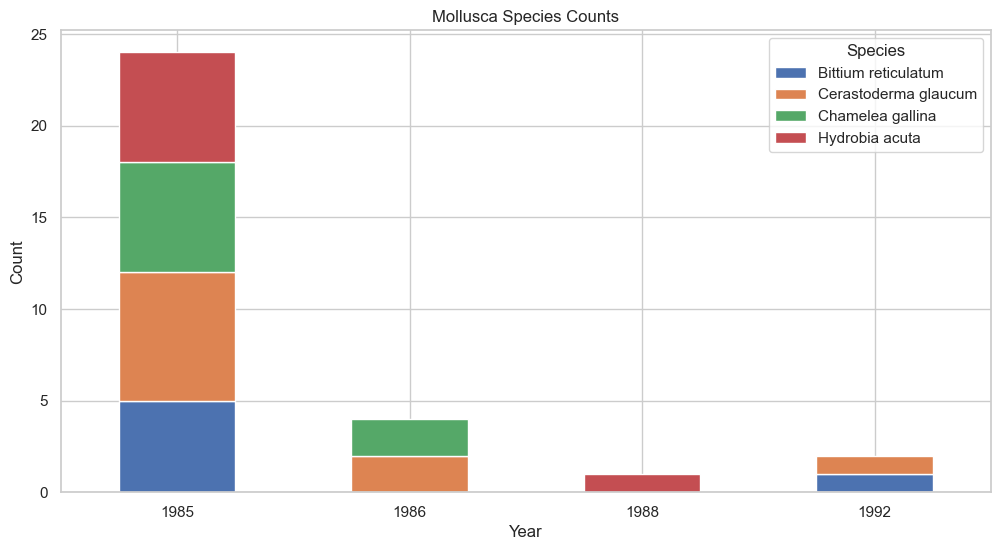

In [166]:
#Mollusca Count over years


years_to_analyze = [1985, 1986, 1988, 1992]

species_to_plot = ['Cerastoderma glaucum', 'Chamelea gallina', 'Hydrobia acuta', 'Bittium reticulatum']

# Filter the DataFrame for the selected species and years
filtered_data = df[df['yearcollected'].isin(years_to_analyze) & df['scientificname'].isin(species_to_plot)]

# Group the data by species and year, and count the occurrences
species_counts = filtered_data.groupby(['yearcollected', 'scientificname']).size().unstack(fill_value=0)


species_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Mollusca Species Counts')
plt.xticks(rotation=0)  
plt.legend(title='Species')
plt.savefig("Mollusca_Black_over_year.pdf", format="pdf")
plt.show()

In [8]:
#Annelida
# Filter the DataFrame for rows where 'Phylum' is 'Annelida'
annelida_data = df[df['phylum'] == 'Annelida']

# Count the occurrences of each unique scientific name within the 'Annelida' phylum
scientificname_counts = annelida_data['scientificname'].value_counts().reset_index()
scientificname_counts.columns = ['Scientific Name', 'Count']


scientificname_counts = scientificname_counts[scientificname_counts['Count'] >= 7]


scientificname_counts = scientificname_counts.sort_values(by='Count', ascending=False)


#plt.figure(figsize=(12, 6))
#sns.barplot(x='Scientific Name', y='Count', data=scientificname_counts, palette='Set1')
#plt.xlabel('Scientific Name')
#plt.ylabel('Count')
#plt.title('Scientific Names within Annelida Phylum')
#plt.xticks(rotation=0) 
#plt.show()


In [9]:
#Annelida count over years


years_to_analyze = [1985, 1986, 1988, 1992]

species_to_plot = ['Nephtys hombergii', 'Polydora ciliata', 'Capitella capitata']


filtered_data = df[df['yearcollected'].isin(years_to_analyze) & df['scientificname'].isin(species_to_plot)]


species_counts = filtered_data.groupby(['yearcollected', 'scientificname']).size().unstack(fill_value=0)


#plt.figure(figsize=(12, 6))
#sns.set_theme(style="whitegrid")
#ax = sns.barplot(data=species_counts, ci=None, palette="husl", dodge=False)
#ax.set_xlabel('Year')
#ax.set_ylabel('Count')
#ax.set_title('Annelida Species Counts (Selected Years)')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
#ax.legend(title='Species', labels=species_to_plot)
#plt.show()

In [10]:
#Anthropoda

# Filter the DataFrame for rows where 'Phylum' is 'Arthropoda'
arthropoda_data = df[df['phylum'] == 'Arthropoda']

# Count the occurrences of each unique scientific name within the 'Arthropoda' phylum
scientificname_counts = arthropoda_data['scientificname'].value_counts().reset_index()
scientificname_counts.columns = ['Scientific Name', 'Count']


scientificname_counts = scientificname_counts[scientificname_counts['Count'] >= 7]


scientificname_counts = scientificname_counts.sort_values(by='Count', ascending=False)


#plt.figure(figsize=(12, 6))
#sns.barplot(x='Count', y='Scientific Name', data=scientificname_counts, palette='Set1')
#plt.xlabel('Count')
#plt.ylabel('Scientific Name')
#plt.title('Scientific Names within Arthropoda Phylum')
#plt.show()


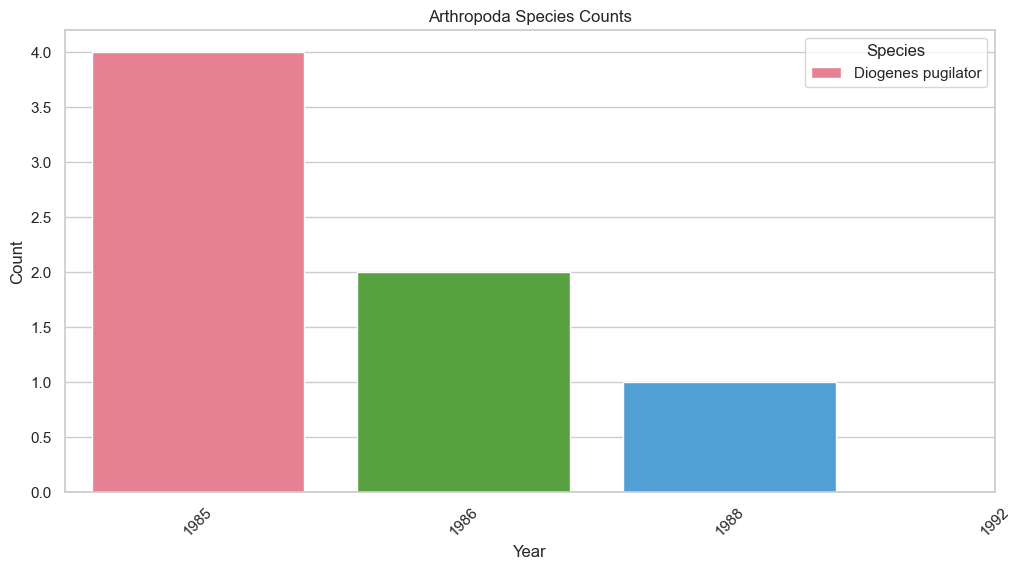

In [169]:


years_to_analyze = [1985, 1986, 1988, 1992]

species_to_plot = ['Diogenes pugilator']


filtered_data = df[df['yearcollected'].isin(years_to_analyze) & df['scientificname'].isin(species_to_plot)]


species_counts = filtered_data.groupby(['yearcollected', 'scientificname']).size().unstack(fill_value=0)


plt.figure(figsize=(12, 6))
sns.set_palette("Set1")
ax = sns.barplot(x=species_counts.index, y=species_counts.sum(axis=1), ci=None, palette="husl")
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Arthropoda Species Counts')
ax.set_xticks(range(len(years_to_analyze)))
ax.set_xticklabels(years_to_analyze)
ax.legend(title='Species', labels=species_to_plot)
plt.xticks(rotation=45)  
plt.savefig("Anthropoda_black_over_years.pdf", format="pdf")
plt.show()


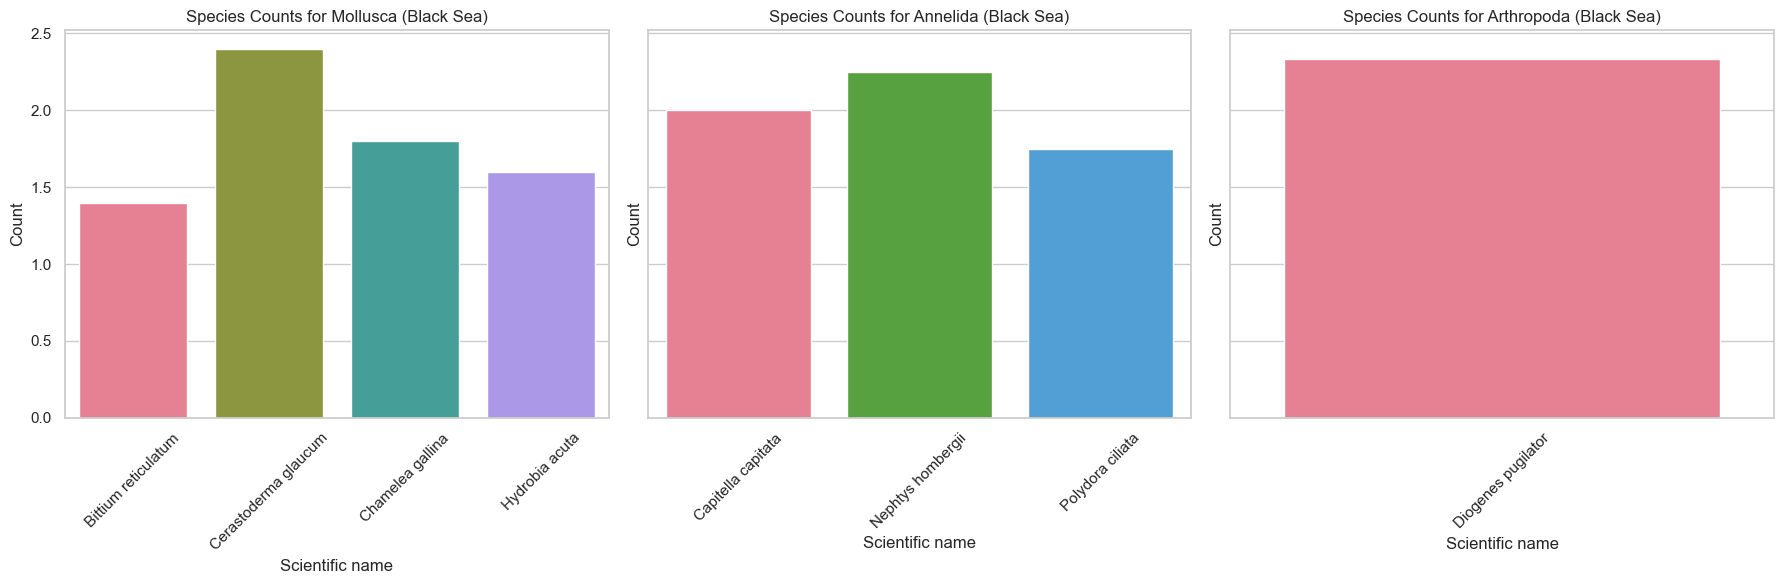

In [189]:
# Define the specific species for each phylum 
mollusca_black_sea_species = ['Cerastoderma glaucum', 'Chamelea gallina', 'Hydrobia acuta', 'Bittium reticulatum']
annelida_black_sea_species = ['Nephtys hombergii', 'Capitella capitata', 'Polydora ciliata']
arthropoda_black_sea_species = ['Diogenes pugilator']


fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)


for i, (phylum, species) in enumerate(zip(['Mollusca', 'Annelida', 'Arthropoda'], [mollusca_black_sea_species, annelida_black_sea_species, arthropoda_black_sea_species])):
    phylum_data = df[(df['phylum'] == phylum) & (df['scientificname'].isin(species))]
    
    species_counts = phylum_data.groupby(['yearcollected', 'scientificname']).size().unstack(fill_value=0)
    
    ax = sns.barplot(data=species_counts, ci=None, palette="husl", dodge=False, ax=axes[i])
    ax.set_xlabel('Scientific name')
    ax.set_ylabel('Count')
    ax.set_title(f'Species Counts for {phylum} (Black Sea)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.savefig("species_counts_plot_Black_Sea.pdf", format="pdf")
plt.show()


In [170]:

import pandas as pd




species_to_count = [
    'Cerastoderma glaucum',
    'Chamelea gallina',
    'Hydrobia acuta',
    'Bittium reticulatum',
    'Nephtys hombergii',
    'Polydora ciliata',
    'Capitella capitata',
    'Diogenes pugilator'
]

# Filter the DataFrame for the selected species
filtered_data = df[df['scientificname'].isin(species_to_count)]

# Count the occurrences of each species
species_counts = filtered_data['scientificname'].value_counts()


for species, count in species_counts.items():
    print(f"Species: {species}, Count: {count}")



Species: Cerastoderma glaucum, Count: 12
Species: Chamelea gallina, Count: 9
Species: Nephtys hombergii, Count: 9
Species: Capitella capitata, Count: 8
Species: Hydrobia acuta, Count: 8
Species: Diogenes pugilator, Count: 7
Species: Polydora ciliata, Count: 7
Species: Bittium reticulatum, Count: 7


In [171]:
import math


species_counts = {
    'Cerastoderma glaucum': 12,
    'Chamelea gallina': 9,
    'Nephtys hombergii': 9,
    'Capitella capitata': 8,
    'Hydrobia acuta': 8,
    'Diogenes pugilator': 7,
    'Polydora ciliata': 7,
    'Bittium reticulatum': 7
}

# Calculate the total abundance in the sample
total_abundance = sum(species_counts.values())

# Calculate the relative abundance (Pi) for each species
relative_abundance = {species: count / total_abundance for species, count in species_counts.items()}

# Calculate the natural logarithm (ln) of each Pi value
ln_pi_values = {species: math.log(pi) for species, pi in relative_abundance.items()}

# Calculate Pi * ln(Pi) for each species
pi_ln_values = {species: pi * ln_pi for species, pi, ln_pi in zip(relative_abundance.keys(), relative_abundance.values(), ln_pi_values.values())}

# Calculate the Shannon Diversity Index (H) for this sample
shannon_index = -sum(pi_ln_values.values())


print(f"Shannon Diversity Index (H): {shannon_index:.3f}")

Shannon Diversity Index (H): 2.063


In [172]:
import pandas as pd

df_train = pd.read_csv('Black_sea.csv')


selected_columns = df_train[['seasoncollected', 'phylum', 'yearcollected']]


output_csv_file = 'black_model_train.csv'


selected_columns.to_csv(output_csv_file, index=False)

In [179]:

season_mapping = {"spring": 1, "summer": 0, "winter":2}


df['seasoncollected'] = df['seasoncollected'].map(season_mapping)

print(season_mapping)


{'spring': 1, 'summer': 0, 'winter': 2}


In [178]:
df_m = pd.read_csv('black_model_train.csv')
df_m.head(3)

print(df_m.columns)


Index(['seasoncollected', 'phylum', 'yearcollected'], dtype='object')


In [180]:

phylum_mapping = {'Annelida': 0, 'Anthropoda': 1, 'Mollusca': 2}

# Map the 'phylum' column to binary values and create a new 'phylum_binary' column
df_m['phylum_binary'] = df_m['phylum'].map(phylum_mapping)


print(df_m.head())


  seasoncollected      phylum  yearcollected  phylum_binary
0          summer    Mollusca           1986            2.0
1          summer  Arthropoda           1986            NaN
2          summer  Arthropoda           1986            NaN
3          summer  Arthropoda           1986            NaN
4          summer  Arthropoda           1986            NaN


In [185]:
# Drop rows with NaN values in the 'phylum_binary' column
df_m = df_m.dropna(subset=['phylum_binary'])

# Map 'seasoncollected' values to 0 for 'spring' and 1 for 'summer'
season_mapping = {'spring': 0, 'summer': 1}
df_m['SC'] = df_m['seasoncollected'].map(season_mapping)

# Convert 'phylum_binary' column to integers
df_m['phylum_binary'] = df_m['phylum_binary'].astype(int)


print(df_m.head())


   seasoncollected    phylum  yearcollected  phylum_binary  SC
0           summer  Mollusca           1986              2   1
5           summer  Annelida           1986              0   1
9           summer  Annelida           1986              0   1
10          summer  Mollusca           1986              2   1
11          summer  Annelida           1986              0   1


In [186]:
selected_phyla = ['Mollusca', 'Annelida', 'Anthropoda']
df_m = df_m[df_m['phylum'].isin(selected_phyla)]
df_m.drop(columns=['seasoncollected', 'phylum'], inplace=True)
df_m.head()

,yearcollected,phylum_binary,SC
0,1986,2,1
5,1986,0,1
9,1986,0,1
10,1986,2,1
11,1986,0,1


In [187]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Separate the target variable from the features
X = df_m.drop(columns=['yearcollected'])
y = df_m['yearcollected']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.59375


In [188]:
# Calculate the Pearson correlation coefficient and the p-value
correlation, p_value = pearsonr(df_m['phylum_binary'], df_m['yearcollected'])

print(f"Pearson Correlation: {correlation:.2f}")
print(f"P-Value: {p_value:.2f}")


Pearson Correlation: -0.04
P-Value: 0.62


In [12]:
import pandas as pd


tkc = pd.read_csv('Black_revised.csv')

# Filter the dataset for 'Phylum' values of 'Mollusca,' 'Annelida,' and 'Arthropoda'
selected_phyla = ['Mollusca', 'Annelida', 'Arthropoda']
filtered_df =tkc[tkc['phylum'].isin(selected_phyla)]


selected_years = [1982, 1985, 1986, 1988, 1992]
filtered_df = filtered_df[filtered_df['yearcollected'].isin(selected_years)]




In [13]:
import numpy as np


filtered_df['phylum'] = filtered_df['phylum'].str.strip()

# Group the data by 'Year Collected' and 'Phylum' and calculate the count
grouped_data = filtered_df.groupby(['yearcollected', 'phylum']).size().unstack().fillna(0)


years = grouped_data.index.astype(str)


#plt.figure(figsize=(10, 6))
#bar_width = 0.2
#for i, phylum in enumerate(selected_phyla):
#    count = grouped_data[phylum]
#    x_positions = np.arange(len(years)) + i * bar_width
#    plt.bar(x_positions, count, width=bar_width, label=phylum)

#plt.title('Phylum Distribution Over 1982-1992')
#plt.xlabel('Year Collected')
#plt.ylabel('Count')
#plt.xticks(np.arange(len(years)) + (bar_width * len(selected_phyla)) / 2, years)
#plt.legend()
#plt.show()
